Image dimensions: 128x128 pixels
Max-tree build time: 0.000955s
Number of max-tree nodes: 746
Number of max-tree leaves: 308


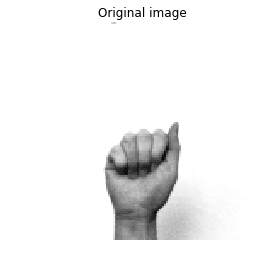

In [1]:
# This makes plots appear in the notebook
%matplotlib inline 

import numpy as np # numpy is the major library in which siamxt was built upon
                   # we like the array programming style =)

# We are using PIL to read images     
from PIL import Image

# and matplotlib to display images
import matplotlib.pyplot as plt

import time # Let's measure some processing times

import siamxt  

# Loading the image.
# Make sure the image you read is either uint8 or uint16
img = np.asarray(Image.open("./Triesch/bfritza1.pgm"))
print("Image dimensions: %dx%d pixels" %img.shape)

#Displaying the image
fig = plt.figure()
plt.imshow(img, cmap='Greys_r')
plt.axis('off')
plt.title("Original image")


#Structuring element with connectivity-8
# Bc = np.ones((3,3),dtype = bool)

Bc = np.array(((0,1,0),(1,0,1),(0,1,0)),dtype=bool)

t = time.time()
#Building the max-tree with the connectivity defined
mxt = siamxt.MaxTreeAlpha(img,Bc)
t = time.time() -t

print("Max-tree build time: %fs" %t)
print("Number of max-tree nodes: %d" %mxt.node_array.shape[1])
print("Number of max-tree leaves: %d" %(mxt.node_array[1,:] == 0).sum())

Number of max-tree nodes: 251
Number of max-tree leaves: 8


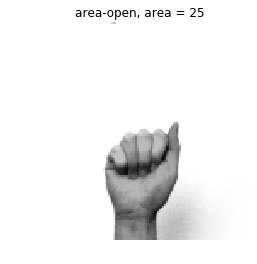

In [2]:
# Area threshold
area = 25

# Making a hard copy of the max-tree
mxt2 = mxt.clone()

#Applying an area-open filter
mxt.areaOpen(area)

#Recovering the image 
img_filtered =  mxt.getImage()

#Displaying the filtered image
fig = plt.figure()
plt.imshow(img_filtered, cmap='Greys_r')
plt.axis('off')
plt.title("area-open, area = %d " %area)

mxt_f = siamxt.MaxTreeAlpha(img_filtered,Bc)

print("Number of max-tree nodes: %d" %mxt_f.node_array.shape[1])
print("Number of max-tree leaves: %d" %(mxt_f.node_array[1,:] == 0).sum())